<a href="https://colab.research.google.com/github/gaeun120312/Deeplearning/blob/main/20_%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fatal: destination path 'data-ch20' already exists and is not an empty directory.
Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Epoch 1/100
32/32 [==============================] - 4s 57ms/step - loss: 0.7034 - accuracy: 0.4625 - val_loss: 0.6912 - val_accuracy: 0.5600
Epoch 2/100
32/32 [==============================] - 1s 38ms/step - loss: 0.6927 - accuracy: 0.5000 - val_loss: 0.6913 - val_accuracy: 0.6000
Epoch 3/100
32/32 [==============================] - 1s 37ms/step - loss: 0.6938 - accuracy: 0.5375 - val_loss: 0.6887 - val_accuracy: 0.5400
Epoch 4/100
32/32 [==============================] - 1s 37ms/step - loss: 0.6886 - accuracy: 0.5688 - val_loss: 0.6846 - val_accuracy: 0.5400
Epoch 5/100
32/32 [==============================] - 1s 36ms/step - loss: 0.6869 - accuracy: 0.5688 - val_loss: 0.6778 - val_accuracy: 0.7800
Epoch 6/100
32/32 [==============================] - 1s 35ms/step - loss: 0.6727 - accuracy: 0.6750 - val_loss: 0.6522 - val_a

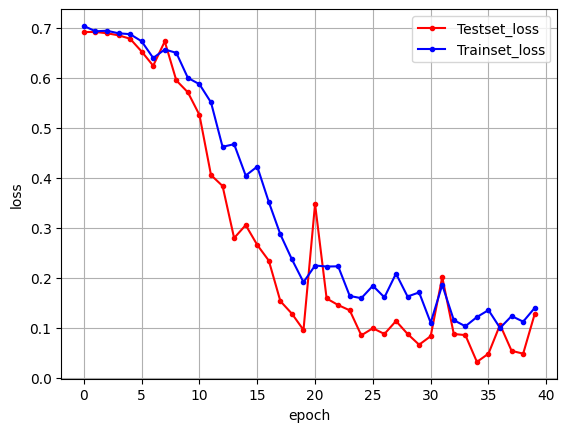

In [ ]:
# CNN - 치매 환자의 뇌인지 일반인의 뇌인지 예측하기
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

!git clone https://github.com/taehojo/data-ch20.git

train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   #rotation_range=5,
                                   #shear_range=0.7,
                                   #zoom_range=1.2,
                                   #vertical_flip=True,
                                   #fill_mode='nearst'

                                  )

train_generator = train_datagen.flow_from_directory(
    './data-ch20/train',  # 학습셋이 있는 폴더 위치
    target_size = (150, 150),
    batch_size = 5,
    class_mode = 'binary'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    './data-ch20/test', # 테스트셋이 있는 폴더 위치
    target_size = (150, 150),
    batch_size = 5,
    class_mode = 'binary'
)

model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

early_stooping_callback = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    train_generator,
    epochs = 100,
    validation_data = test_generator,
    validation_steps = 10,
    callbacks = [early_stooping_callback]
)

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c="blue", label="Trainset_loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

fatal: destination path 'data-ch20' already exists and is not an empty directory.
Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                524352    
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)      

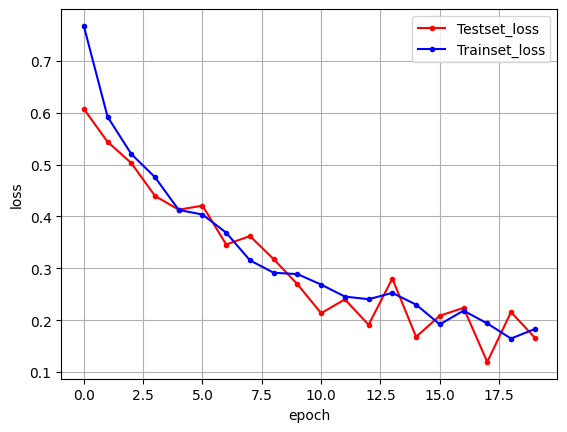

In [3]:
# 전이 학습으로 모델 성능 극대화하기
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

!git clone https://github.com/taehojo/data-ch20.git

train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                  )

train_generator = train_datagen.flow_from_directory(
    './data-ch20/train',  # 학습셋이 있는 폴더 위치
    target_size = (150, 150),
    batch_size = 5,
    class_mode = 'binary'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    './data-ch20/test', # 테스트셋이 있는 폴더 위치
    target_size = (150, 150),
    batch_size = 5,
    class_mode = 'binary'
)

# VGG16 모델 불러오기
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
transfer_model.trainable = False

# 우리의 모델 설정
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64))
finetune_model.add(Activation('relu'))
finetune_model.add(Dropout(0.5))
finetune_model.add(Dense(1))
finetune_model.add(Activation('sigmoid'))
finetune_model.summary()

# 모델 실행 옵션 설정
finetune_model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

# 학습 조기 중단 설정
early_stooping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델 실행
history = finetune_model.fit(
    train_generator,
    epochs = 20,
    validation_data = test_generator,
    validation_steps = 10,
    callbacks = [early_stooping_callback]
)

# 검증셋과 학습셋의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']


# 그래프 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c="blue", label="Trainset_loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()